### Basic linear regression with synthetic data

1.7804851303758737 [1.78908082]
R-square is: 0.8571356016801874
Training error is: 0.01066999943533126
Testing error is: 0.13213357697947492


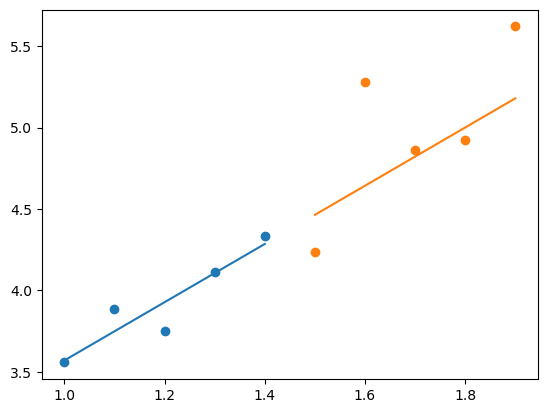

In [147]:
import numpy as np 
import random as rd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.arange(1, 2, 0.1)

# Convert x-data into 2D column vectors 

x_train = x[0:int(len(x)/2)].reshape(-1,1)
x_test = x[int(len(x)/2):len(x)].reshape(-1, 1)

m = 2*rd.random()
c = 10*rd.random()

# y-data as 1D row vectors
y = m*x+c 
y_prime = [0]*len(x)

for i in range(len(x)):
    y_prime[i] = y[i] + rd.random()

y_prime = np.array(y_prime)

y_train = y_prime[0:int(len(y)/2)]
y_test = y_prime[int(len(y)/2):len(y)]


## Linear regression model.

Model = LinearRegression()
Model = LinearRegression().fit(x_train, y_train)
r_sq = Model.score(x_train, y_train)

plt.scatter(x_train,y_train)

Model_c = Model.intercept_
Model_m = Model.coef_

print(Model.intercept_,Model.coef_)

y_trained = Model_m*x_train + Model_c

plt.plot(x_train,y_trained)

training_error = sum((y_trained.reshape(-1) - y_train)**2)/len(y_train)

print('R-square is:',r_sq)
print('Training error is:',training_error)

# Predicted response

y_predicted = Model_m*x_test + Model_c

testing_error = sum((y_predicted.reshape(-1) - y_test)**2)/len(y_test)

plt.scatter(x_test,y_test)
plt.plot(x_test,y_predicted)

print('Testing error is:',testing_error)

In [82]:
rng = np.random.default_rng()
rng.random([2,2])

array([[0.32724944, 0.57007948],
       [0.78488514, 0.80954067]])

### Multivariate linear regression

In [117]:
import numpy as np

x1 = np.array([[-1/2,1/4,1/4,1]])
x2 = np.array([[1/3,-1,2/3,1]])
x3 = np.array([[1/2,1/2,-1,1]])

# To solve a multivariate linear regression, one has to provide the data in terms of a matrix with each column representing all the data points in first dimension. 
# Hence, an N-dimensional problem, with M features, can be solved by using a linear model with an N x M matrix representing the data.

Mat = np.transpose(np.concatenate((x1,x2,x3)))

Mat[:,0]

print(Mat)

y = np.array([0,0,0,1])

Model = LinearRegression().fit(Mat, y)

Model_c = Model.intercept_
Model_pi = Model.coef_

Model_pi

[[-0.5         0.33333333  0.5       ]
 [ 0.25       -1.          0.5       ]
 [ 0.25        0.66666667 -1.        ]
 [ 1.          1.          1.        ]]


array([0.45714286, 0.25714286, 0.28571429])

In [154]:
P = np.array([[1,0,0],[1/3,1/3,1/3],[0,0,1]])

for i in range(10):
    P = np.matmul(P,P)
    
P

array([[1. , 0. , 0. ],
       [0.5, 0. , 0.5],
       [0. , 0. , 1. ]])